In [57]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve,auc
from imblearn.over_sampling import SMOTE
from geopy.distance import geodesic
import joblib



In [58]:
df = pd.read_csv(r"D:\Project Detales\Codsoft\fraudTest.csv")

In [59]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [60]:
pd.options.display.max_columns = None

In [61]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [62]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [63]:
df.shape

(555719, 23)

In [64]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 23
Number of rows: 555719


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [66]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [67]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month

In [68]:
drop_columns = ['Unnamed: 0','trans_date_trans_time','first','last','street','city','state','zip','dob','job','trans_num']
df = df.drop(columns=drop_columns)

In [69]:
df.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,12,21,6
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,12,21,6
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,12,21,6
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,12,21,6
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,12,21,6


In [70]:
cat_col = ['merchant','category','gender']
encoders = {}
for col in cat_col:
  encoders[col]=LabelEncoder()
  df[col]=encoders[col].fit_transform(df[col])

In [71]:
def haversine(lat1,lon1,lat2,lon2):
  return np.array([geodesic((a,b),(c,d)).km for a,b,c,d in zip(lat1,lon1,lat2,lon2)])
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [72]:
df.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,distance
0,2291163933867244,319,10,2.86,1,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0,12,21,6,24.613746
1,3573030041201292,591,10,29.84,0,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0,12,21,6,104.834043
2,3598215285024754,611,5,41.28,0,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0,12,21,6,59.204796
3,3591919803438423,222,9,60.05,1,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0,12,21,6,27.615117
4,3526826139003047,292,13,3.19,1,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0,12,21,6,104.423175


In [73]:
features = ['merchant','category','amt','cc_num','hour','day','month','gender','distance']
x = df[features]
y = df['is_fraud']

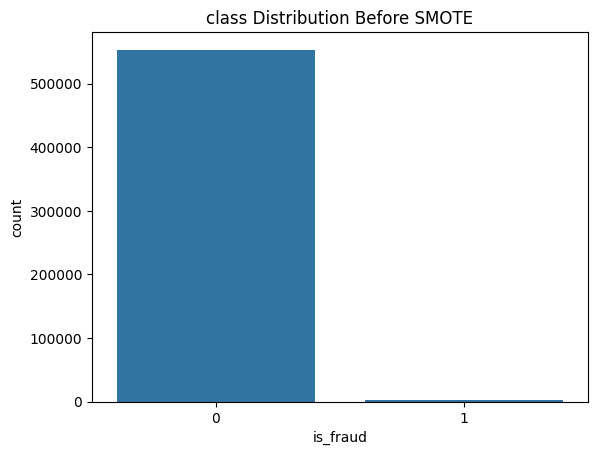

In [74]:
plt.Figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title("class Distribution Before SMOTE")
plt.show()

In [75]:
smote = SMOTE(random_state=42)
x_resample, y_resample = smote.fit_resample(x,y)

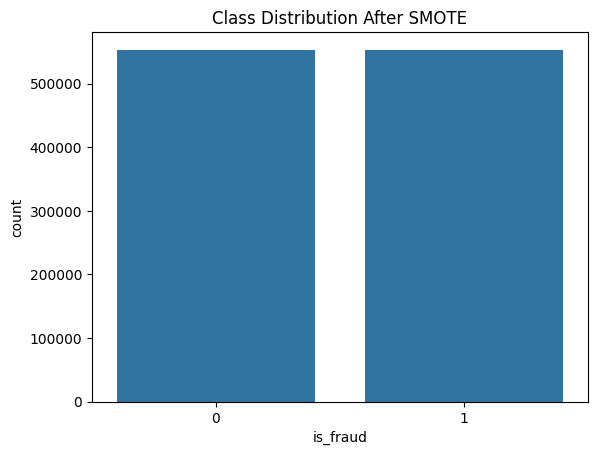

In [76]:
plt.Figure(figsize=(6,4))
sns.countplot(x=y_resample)
plt.title("Class Distribution After SMOTE")
plt.show()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42)

### Train LGBMClassifier Model

In [78]:
lgb_model = lgb.LGBMClassifier(
  boosting_type='gbdt',
  objective='binary',
  metrics = 'auc',
  is_unbalance = True,
  learning_rate=0.05,
  num_leaves=31,
  max_depth=1,
  n_estimators=200
)
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 442566, number of negative: 443152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 885718, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499669 -> initscore=-0.001323
[LightGBM] [Info] Start training from score -0.001323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,1
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [79]:
y_pred = lgb_model.predict(x_test)

In [80]:
print("classification_report:\n", classification_report(y_test,y_pred))
print("Roc AUC Score: ", roc_auc_score(y_test, y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87    110422
           1       0.94      0.78      0.85    111008

    accuracy                           0.86    221430
   macro avg       0.88      0.86      0.86    221430
weighted avg       0.88      0.86      0.86    221430

Roc AUC Score:  0.8642200905186929


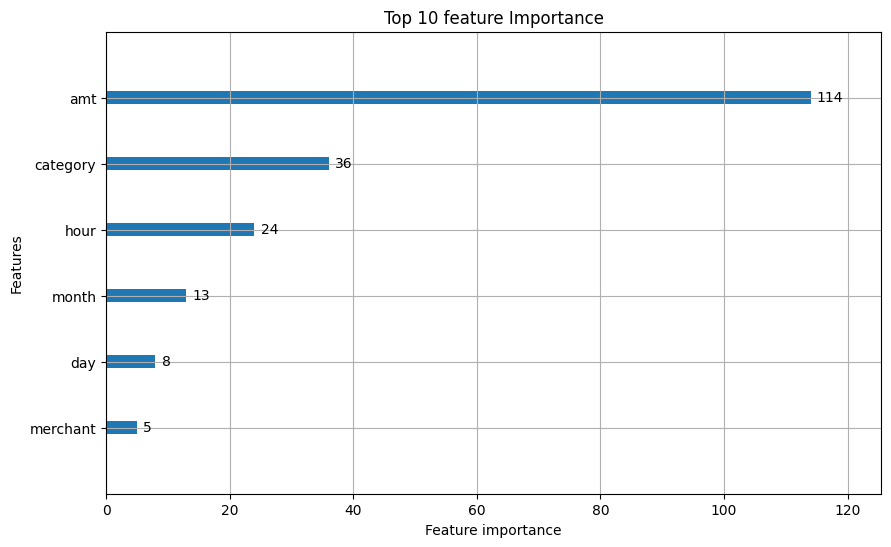

In [81]:
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', figsize=(10,6))
plt.title("Top 10 feature Importance")
plt.show()

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

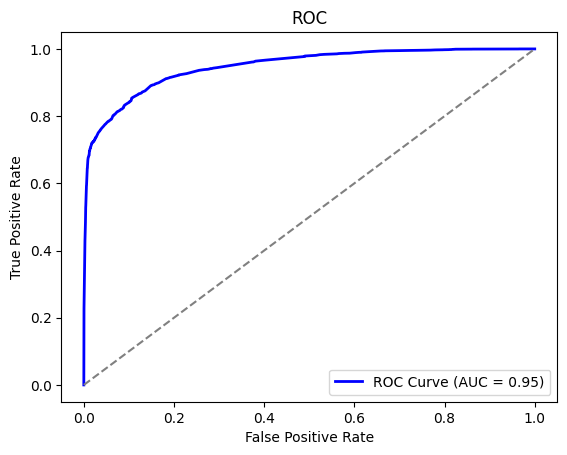

In [83]:
plt.Figure(figsize=(6,6))
plt.plot(fpr, tpr, color = 'blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='gray', linestyle='--')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [104]:
joblib.dump(lgb_model, "fraud_detection_model.jb")
joblib.dump(encoders,"label_encoder.jb")

['label_encoder.jb']

### Train Random Forests Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

In [89]:
x = df[['amt', 'gender', 'city_pop', 'hour', 'day', 'month', 'distance']]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [93]:
rf_model.fit(x_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [95]:
rf_predictions = rf_model.predict(x_test)

In [102]:
from sklearn.metrics import recall_score, f1_score, r2_score, precision_score, accuracy_score, confusion_matrix, classification_report

In [103]:
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print("r2_Score: ", r2_score(y_test, rf_predictions))
print("Precision_score: ", precision_score(y_test, rf_predictions))
print("Recall_score: ", recall_score(y_test, rf_predictions))
print("f1_score: ", f1_score(y_test, rf_predictions))

Random Forest Model:
[[166019     57]
 [   375    265]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.82      0.41      0.55       640

    accuracy                           1.00    166716
   macro avg       0.91      0.71      0.77    166716
weighted avg       1.00      1.00      1.00    166716

Accuracy:  0.9974087670049665
r2_Score:  0.32239878128085964
Precision_score:  0.8229813664596274
Recall_score:  0.4140625
f1_score:  0.5509355509355509


### Train Logistic Regression Model

In [105]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [106]:
lr_model.fit(x_train, y_train)

C:\Users\rahul\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [107]:
lr_predictions = lr_model.predict(x_test)

In [108]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[166030     46]
 [   640      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

Accuracy:  0.9958852179754792
r2_Score:  -0.07600563898456092
Precision_score:  0.0
Recall_score:  0.0
f1_score:  0.0


### Train Gradient Boosting Model

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [111]:
gb_model.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.02
,n_estimators,1000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,1
,min_impurity_decrease,0.0
,init,None


In [112]:
gb_predictions = gb_model.predict(x_test)

In [113]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))
print("r2_Score: ", r2_score(y_test, gb_predictions))
print("Precision_score: ", precision_score(y_test, gb_predictions))
print("Recall_score: ", recall_score(y_test, gb_predictions))
print("f1_score: ", f1_score(y_test, gb_predictions))

Gradient Boosting Model:
[[165980     96]
 [   397    243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.72      0.38      0.50       640

    accuracy                           1.00    166716
   macro avg       0.86      0.69      0.75    166716
weighted avg       1.00      1.00      1.00    166716

Accuracy:  0.9970428753089086
r2_Score:  0.22671897956357356
Precision_score:  0.7168141592920354
Recall_score:  0.3796875
f1_score:  0.4964249233912155
